# Import

In [48]:
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from haversine import haversine
from IPython.display import HTML
import plotly.graph_objects as go

In [49]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

# Data intro

- Korea

In [89]:
df_korea = pd.read_csv('./dataset/korea_kospi.csv')

In [90]:
df_korea = pd.concat([df_korea,pd.DataFrame({'lat': [35.9078]*len(df_korea), 'lon': [127.7669]*len(df_korea),'country': 'Korea'})],axis=1)

In [91]:
df_korea_add = df_korea.assign(Year = list(map(lambda x: x.split('-')[0],df_korea['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_korea['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_korea['Date'])))

In [92]:
df_korea_add.Year = df_korea_add.Year.astype(np.float64)
df_korea_add.Mon = df_korea_add.Mon.astype(np.float64)
df_korea_add.Day = df_korea_add.Day.astype(np.float64)

In [93]:
df_korea_covid = df_korea_add.query("Year>=2020");df_korea_covid

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
364,2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,2175.169922,494700,35.9078,127.7669,Korea,2020.0,1.0,2.0
365,2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,2176.459961,631600,35.9078,127.7669,Korea,2020.0,1.0,3.0
366,2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,2155.070068,592700,35.9078,127.7669,Korea,2020.0,1.0,6.0
367,2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,2175.540039,568200,35.9078,127.7669,Korea,2020.0,1.0,7.0
368,2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,2151.310059,913800,35.9078,127.7669,Korea,2020.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2023-07-03,2580.889893,2604.629883,2580.489990,2602.469971,2602.469971,615500,35.9078,127.7669,Korea,2023.0,7.0,3.0
1228,2023-07-04,2604.719971,2607.659912,2591.860107,2593.310059,2593.310059,673100,35.9078,127.7669,Korea,2023.0,7.0,4.0
1229,2023-07-05,2593.469971,2601.989990,2578.659912,2579.000000,2579.000000,599400,35.9078,127.7669,Korea,2023.0,7.0,5.0
1230,2023-07-06,2574.750000,2575.449951,2550.669922,2556.290039,2556.290039,530800,35.9078,127.7669,Korea,2023.0,7.0,6.0


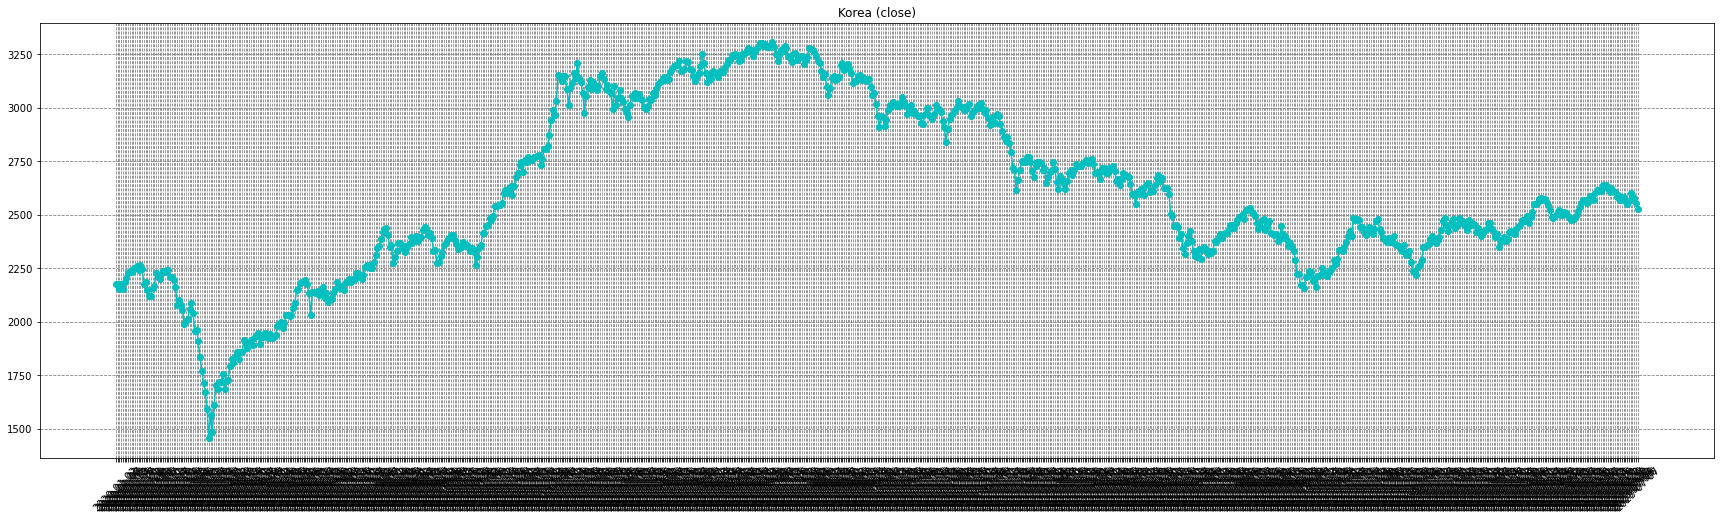

In [94]:
plt.figure(figsize=(30, 8)) 
plt.title('Korea (close)')
plt.xticks(rotation=45) 
plt.plot(df_korea_covid['Date'], df_korea_covid['Close'], 'co-')
plt.grid(color='gray', linestyle='--')

- US

In [95]:
df_us = pd.read_csv('./dataset/us_nasdaq.csv')

In [96]:
df_us = pd.concat([df_us,pd.DataFrame({'lat': [37.0902]*len(df_us), 'lon': [95.7129]*len(df_us),'country': 'US'})],axis=1)

In [97]:
df_us_add = df_us.assign(Year = list(map(lambda x: x.split('-')[0],df_us['Date'])),\
                            Mon = list(map(lambda x: x.split('-')[1],df_us['Date'])),\
                            Day = list(map(lambda x: x.split('-')[2],df_us['Date'])))

In [98]:
df_us_add.Year = df_us_add.Year.astype(np.float64)
df_us_add.Mon = df_us_add.Mon.astype(np.float64)
df_us_add.Day = df_us_add.Day.astype(np.float64)

In [99]:
df_us_covid = df_us_add.query("Year>=2020");df_us_covid

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
374,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2862700000,37.0902,95.7129,US,2020.0,1.0,2.0
375,2020-01-03,8976.429688,9065.759766,8976.429688,9020.769531,9020.769531,2586520000,37.0902,95.7129,US,2020.0,1.0,3.0
376,2020-01-06,8943.500000,9072.410156,8943.500000,9071.469727,9071.469727,2810450000,37.0902,95.7129,US,2020.0,1.0,6.0
377,2020-01-07,9076.639648,9091.929688,9042.549805,9068.580078,9068.580078,2381740000,37.0902,95.7129,US,2020.0,1.0,7.0
378,2020-01-08,9068.030273,9168.889648,9059.379883,9129.240234,9129.240234,2472620000,37.0902,95.7129,US,2020.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2023-06-29,13592.360352,13618.530273,13540.259766,13591.330078,13591.330078,4388140000,37.0902,95.7129,US,2023.0,6.0,29.0
1253,2023-06-30,13719.980469,13816.679688,13716.160156,13787.919922,13787.919922,4661120000,37.0902,95.7129,US,2023.0,6.0,30.0
1254,2023-07-03,13798.700195,13839.089844,13773.410156,13816.769531,13816.769531,2902300000,37.0902,95.7129,US,2023.0,7.0,3.0
1255,2023-07-05,13772.099609,13844.500000,13764.250000,13791.650391,13791.650391,5339340000,37.0902,95.7129,US,2023.0,7.0,5.0


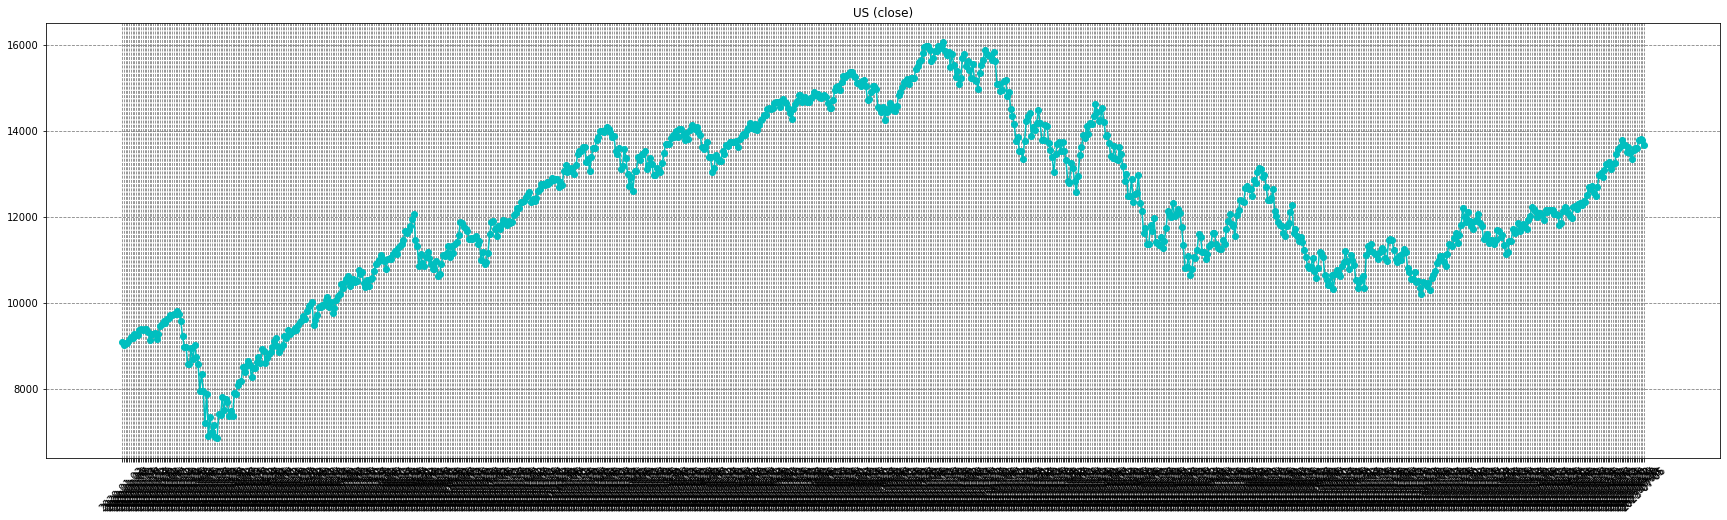

In [100]:
plt.figure(figsize=(30, 8)) 
plt.title('US (close)')
plt.xticks(rotation=45) 
plt.plot(df_us_covid['Date'], df_us_covid['Close'], 'co-')
plt.grid(color='gray', linestyle='--')

- China

In [101]:
df_china = pd.read_csv('./dataset/china_ssec.csv')

In [102]:
df_china = pd.concat([df_china,pd.DataFrame({'lat': [35.8617]*len(df_china), 'lon': [104.1954]*len(df_china),'country': 'China'})],axis=1)

In [103]:
df_china_add = df_china.assign(Year = list(map(lambda x: x.split('-')[0],df_china['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_china['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_china['Date'])))

In [104]:
df_china_add.Year = df_china_add.Year.astype(np.float64)
df_china_add.Mon = df_china_add.Mon.astype(np.float64)
df_china_add.Day = df_china_add.Day.astype(np.float64)

In [105]:
df_china_covid = df_china_add.query("Year>=2020");df_china_covid

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
361,2020-01-02,3066.335938,3098.100098,3066.335938,3085.197998,3085.197998,292500,35.8617,104.1954,China,2020.0,1.0,2.0
362,2020-01-03,3089.021973,3093.819092,3074.518066,3083.785889,3083.785889,261500,35.8617,104.1954,China,2020.0,1.0,3.0
363,2020-01-06,3070.908936,3107.202881,3065.309082,3083.407959,3083.407959,312600,35.8617,104.1954,China,2020.0,1.0,6.0
364,2020-01-07,3085.488037,3105.450928,3084.329102,3104.802002,3104.802002,276600,35.8617,104.1954,China,2020.0,1.0,7.0
365,2020-01-08,3094.239014,3094.239014,3059.131104,3066.893066,3066.893066,297900,35.8617,104.1954,China,2020.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,2023-06-30,3178.919922,3212.989990,3177.989990,3202.060059,3202.060059,265400,35.8617,104.1954,China,2023.0,6.0,30.0
1207,2023-07-03,3209.159912,3246.860107,3209.159912,3243.979980,3243.979980,312400,35.8617,104.1954,China,2023.0,7.0,3.0
1208,2023-07-04,3241.229980,3246.959961,3233.989990,3245.350098,3245.350098,279200,35.8617,104.1954,China,2023.0,7.0,4.0
1209,2023-07-05,3240.050049,3241.840088,3218.600098,3222.949951,3222.949951,264000,35.8617,104.1954,China,2023.0,7.0,5.0


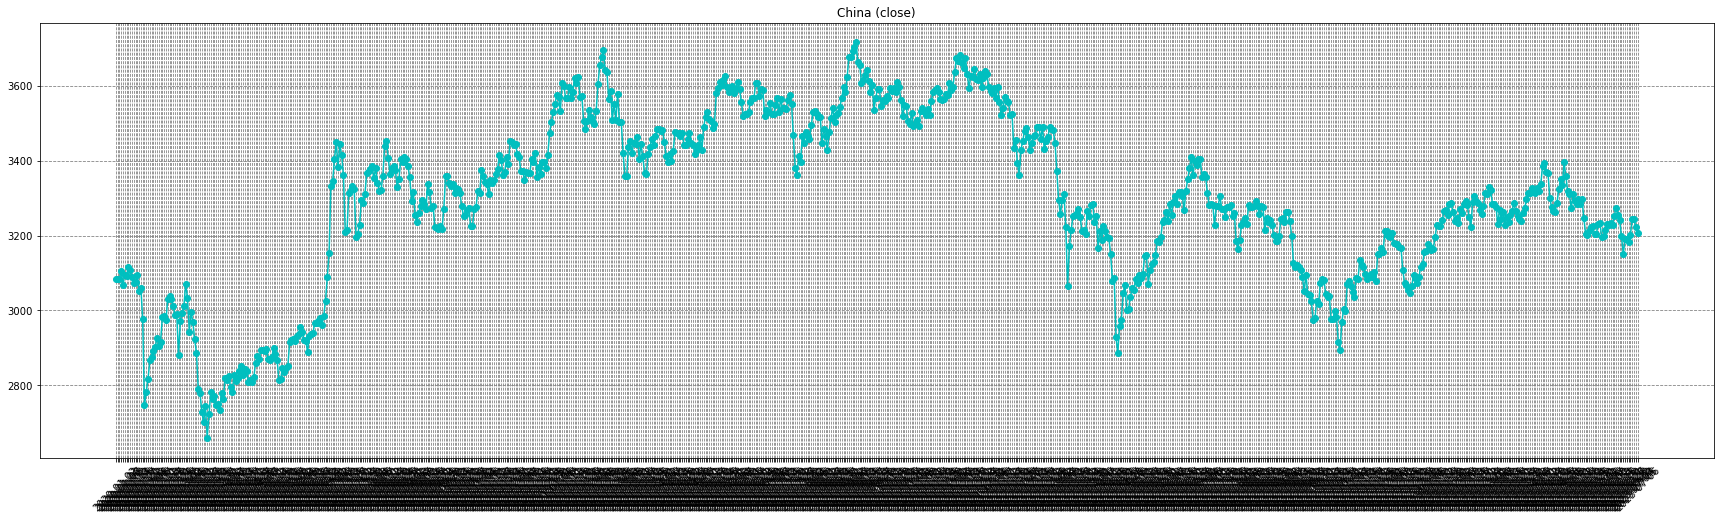

In [106]:
plt.figure(figsize=(30, 8)) 
plt.title('China (close)')
plt.xticks(rotation=45) 
plt.plot(df_china_covid['Date'], df_china_covid['Close'], 'co-')
plt.grid(color='gray', linestyle='--')

- France

In [107]:
df_france = pd.read_csv('./dataset/france_fchi.csv')

In [108]:
df_france = pd.concat([df_france,pd.DataFrame({'lat': [46.2276]*len(df_france), 'lon': [2.2137]*len(df_france),'country': 'France'})],axis=1)

In [109]:
df_france_add = df_france.assign(Year = list(map(lambda x: x.split('-')[0],df_france['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_france['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_france['Date'])))

In [110]:
df_france_add.Year = df_france_add.Year.astype(np.float64)
df_france_add.Mon = df_france_add.Mon.astype(np.float64)
df_france_add.Day = df_france_add.Day.astype(np.float64)

In [111]:
df_france_covid = df_france_add.query("Year>=2020");df_france_covid

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
380,2020-01-02,6016.609863,6062.919922,6011.209961,6041.500000,6041.500000,63958300.0,46.2276,2.2137,France,2020.0,1.0,2.0
381,2020-01-03,6007.959961,6044.160156,5994.589844,6044.160156,6044.160156,60488000.0,46.2276,2.2137,France,2020.0,1.0,3.0
382,2020-01-06,6001.209961,6017.970215,5955.250000,6013.589844,6013.589844,69063700.0,46.2276,2.2137,France,2020.0,1.0,6.0
383,2020-01-07,6033.220215,6065.740234,6000.000000,6012.350098,6012.350098,69593800.0,46.2276,2.2137,France,2020.0,1.0,7.0
384,2020-01-08,5986.810059,6031.000000,5972.770020,6031.000000,6031.000000,71431600.0,46.2276,2.2137,France,2020.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,2023-06-30,7339.890137,7419.359863,7337.279785,7400.060059,7400.060059,0.0,46.2276,2.2137,France,2023.0,6.0,30.0
1279,2023-07-03,7415.169922,7426.600098,7386.700195,7386.700195,7386.700195,46756600.0,46.2276,2.2137,France,2023.0,7.0,3.0
1280,2023-07-04,7390.910156,7401.459961,7368.970215,7369.930176,7369.930176,38120100.0,46.2276,2.2137,France,2023.0,7.0,4.0
1281,2023-07-05,7327.779785,7352.120117,7294.600098,7310.810059,7310.810059,60271900.0,46.2276,2.2137,France,2023.0,7.0,5.0


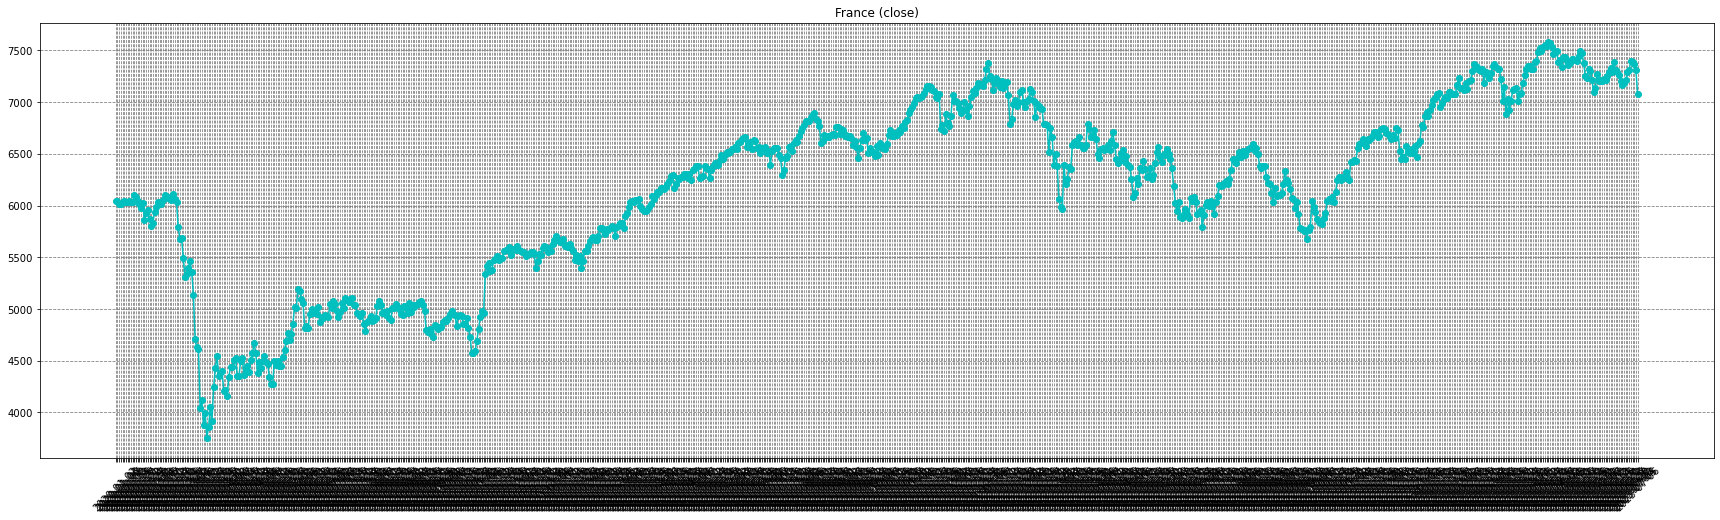

In [112]:
plt.figure(figsize=(30, 8)) 
plt.title('France (close)')
plt.xticks(rotation=45) 
plt.plot(df_france_covid['Date'], df_france_covid['Close'], 'co-')
plt.grid(color='gray', linestyle='--')

- Germany

In [113]:
df_germany = pd.read_csv('./dataset/germany_dax.csv')

In [114]:
df_germany = pd.concat([df_germany,pd.DataFrame({'lat': [51.1657]*len(df_germany), 'lon': [10.4515]*len(df_germany),'country': 'Germany'})],axis=1)

In [115]:
df_germany_add = df_germany.assign(Year = list(map(lambda x: x.split('-')[0],df_germany['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_germany['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_germany['Date'])))

In [116]:
df_germany_add.Year = df_germany_add.Year.astype(np.float64)
df_germany_add.Mon = df_germany_add.Mon.astype(np.float64)
df_germany_add.Day = df_germany_add.Day.astype(np.float64)

In [117]:
df_germany_covid = df_germany_add.query("Year>=2020");df_germany_covid

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
372,2020-01-02,13233.709961,13425.030273,13225.160156,13385.929688,13385.929688,75341400,51.1657,10.4515,Germany,2020.0,1.0,2.0
373,2020-01-03,13266.389648,13282.740234,13120.719727,13219.139648,13219.139648,80793400,51.1657,10.4515,Germany,2020.0,1.0,3.0
374,2020-01-06,13085.490234,13143.110352,12948.169922,13126.990234,13126.990234,71778600,51.1657,10.4515,Germany,2020.0,1.0,6.0
375,2020-01-07,13199.589844,13283.879883,13166.400391,13226.830078,13226.830078,78282300,51.1657,10.4515,Germany,2020.0,1.0,7.0
376,2020-01-08,13140.490234,13334.040039,13106.269531,13320.179688,13320.179688,88178800,51.1657,10.4515,Germany,2020.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,2023-06-30,15989.429688,16176.549805,15978.900391,16147.900391,16147.900391,85583300,51.1657,10.4515,Germany,2023.0,6.0,30.0
1265,2023-07-03,16187.910156,16209.290039,16070.490234,16081.040039,16081.040039,52047600,51.1657,10.4515,Germany,2023.0,7.0,3.0
1266,2023-07-04,16082.929688,16103.950195,16023.719727,16039.169922,16039.169922,42493900,51.1657,10.4515,Germany,2023.0,7.0,4.0
1267,2023-07-05,15930.160156,15982.959961,15901.389648,15937.580078,15937.580078,66456400,51.1657,10.4515,Germany,2023.0,7.0,5.0


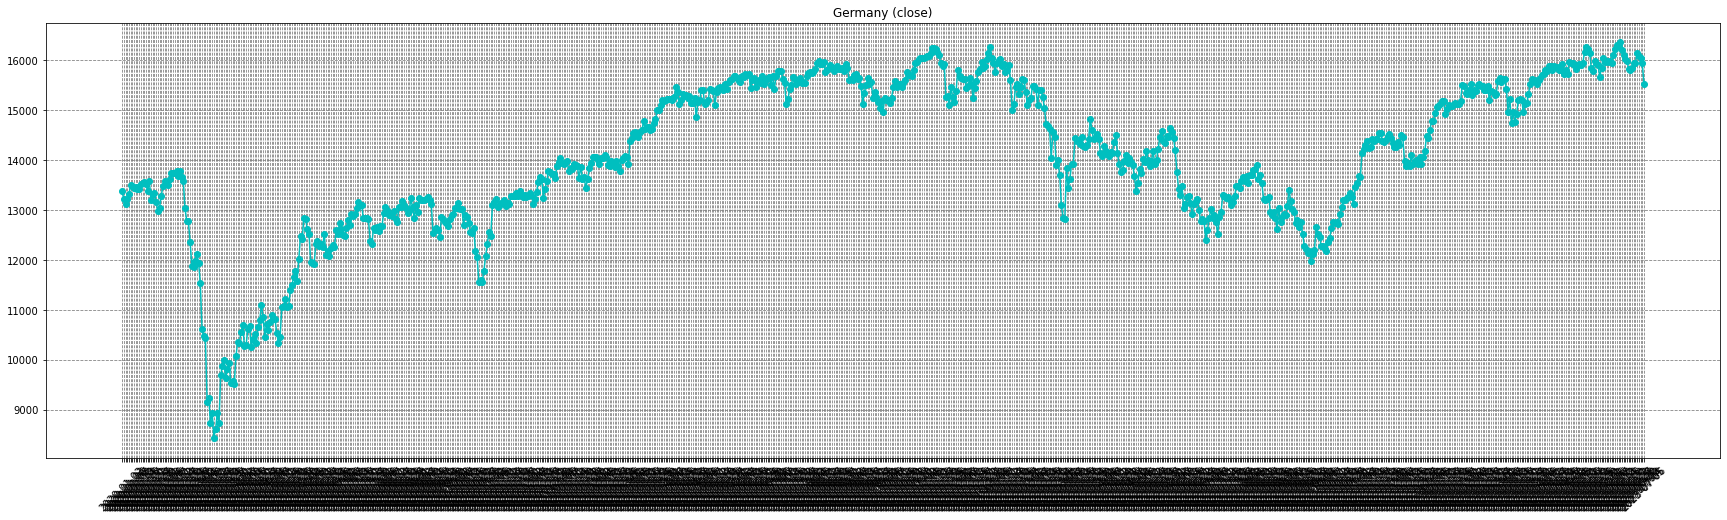

In [118]:
plt.figure(figsize=(30, 8)) 
plt.title('Germany (close)')
plt.xticks(rotation=45) 
plt.plot(df_germany_covid['Date'], df_germany_covid['Close'], 'co-')
plt.grid(color='gray', linestyle='--')

- Hongkong

In [119]:
df_hongkong = pd.read_csv('./dataset/hongkong_hsi.csv')

In [120]:
df_hongkong = pd.concat([df_hongkong,pd.DataFrame({'lat': [22.3193]*len(df_hongkong), 'lon': [114.1694]*len(df_hongkong),'country': 'Hongkong'})],axis=1)

In [121]:
df_hongkong_add = df_hongkong.assign(Year = list(map(lambda x: x.split('-')[0],df_hongkong['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_hongkong['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_hongkong['Date'])))

In [122]:
df_hongkong_add.Year = df_hongkong_add.Year.astype(np.float64)
df_hongkong_add.Mon = df_hongkong_add.Mon.astype(np.float64)
df_hongkong_add.Day = df_hongkong_add.Day.astype(np.float64)

In [123]:
df_hongkong_covid = df_hongkong_add.query("Year>=2020");df_hongkong_covid

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
367,2020-01-02,28249.369141,28543.519531,28245.970703,28543.519531,28543.519531,1262732800,22.3193,114.1694,Hongkong,2020.0,1.0,2.0
368,2020-01-03,28828.359375,28883.300781,28428.169922,28451.500000,28451.500000,1797904800,22.3193,114.1694,Hongkong,2020.0,1.0,3.0
369,2020-01-06,28326.500000,28367.869141,28054.289063,28226.189453,28226.189453,1793426600,22.3193,114.1694,Hongkong,2020.0,1.0,6.0
370,2020-01-07,28352.679688,28473.080078,28264.070313,28322.060547,28322.060547,1302687200,22.3193,114.1694,Hongkong,2020.0,1.0,7.0
371,2020-01-08,27999.580078,28198.609375,27857.730469,28087.919922,28087.919922,1709241600,22.3193,114.1694,Hongkong,2020.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2023-06-30,18881.429688,19070.109375,18838.619141,18916.429688,18916.429688,1869555200,22.3193,114.1694,Hongkong,2023.0,6.0,30.0
1228,2023-07-03,19002.550781,19371.710938,19002.550781,19306.589844,19306.589844,2214447500,22.3193,114.1694,Hongkong,2023.0,7.0,3.0
1229,2023-07-04,19289.060547,19449.109375,19253.220703,19415.679688,19415.679688,1987401200,22.3193,114.1694,Hongkong,2023.0,7.0,4.0
1230,2023-07-05,19355.060547,19378.900391,19095.599609,19110.380859,19110.380859,2432611100,22.3193,114.1694,Hongkong,2023.0,7.0,5.0


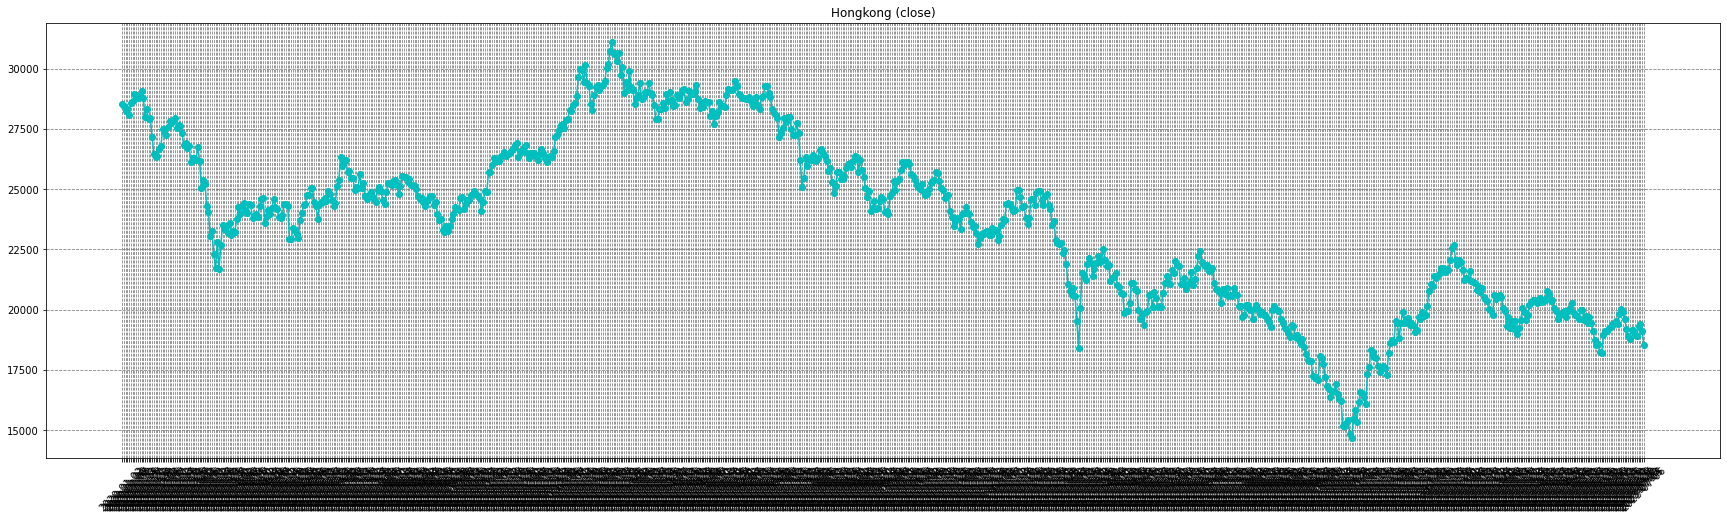

In [124]:
plt.figure(figsize=(30, 8)) 
plt.title('Hongkong (close)')
plt.xticks(rotation=45) 
plt.plot(df_hongkong_covid['Date'], df_hongkong_covid['Close'], 'co-')
plt.grid(color='gray', linestyle='--')

- Japan

In [125]:
df_japan = pd.read_csv('./dataset/japan_n225.csv')

In [126]:
df_japan = pd.concat([df_japan,pd.DataFrame({'lat': [36.2048]*len(df_japan), 'lon': [138.2529]*len(df_japan),'country': 'Japan'})],axis=1)

In [127]:
df_japan_add = df_japan.assign(Year = list(map(lambda x: x.split('-')[0],df_japan['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_japan['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_japan['Date'])))

In [128]:
df_japan_add.Year = df_japan_add.Year.astype(np.float64)
df_japan_add.Mon = df_japan_add.Mon.astype(np.float64)
df_japan_add.Day = df_japan_add.Day.astype(np.float64)

In [129]:
df_japan_covid = df_japan_add.query("Year>=2020");df_japan_covid

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
367,2020-01-06,23319.759766,23365.359375,23148.529297,23204.859375,23204.859375,72800000.0,36.2048,138.2529,Japan,2020.0,1.0,6.0
368,2020-01-07,23320.119141,23577.439453,23299.919922,23575.720703,23575.720703,64300000.0,36.2048,138.2529,Japan,2020.0,1.0,7.0
369,2020-01-08,23217.490234,23303.210938,22951.179688,23204.759766,23204.759766,79400000.0,36.2048,138.2529,Japan,2020.0,1.0,8.0
370,2020-01-09,23530.289063,23767.089844,23506.150391,23739.869141,23739.869141,62200000.0,36.2048,138.2529,Japan,2020.0,1.0,9.0
371,2020-01-10,23813.279297,23903.289063,23761.080078,23850.570313,23850.570313,55900000.0,36.2048,138.2529,Japan,2020.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,2023-07-03,33517.601563,33762.808594,33510.550781,33753.328125,33753.328125,95400000.0,36.2048,138.2529,Japan,2023.0,7.0,3.0
1221,2023-07-04,33512.261719,33576.449219,33338.781250,33422.519531,33422.519531,99400000.0,36.2048,138.2529,Japan,2023.0,7.0,4.0
1222,2023-07-05,33165.058594,33389.218750,33041.140625,33338.699219,33338.699219,95100000.0,36.2048,138.2529,Japan,2023.0,7.0,5.0
1223,2023-07-06,33058.398438,33079.449219,32637.720703,32773.019531,32773.019531,100600000.0,36.2048,138.2529,Japan,2023.0,7.0,6.0


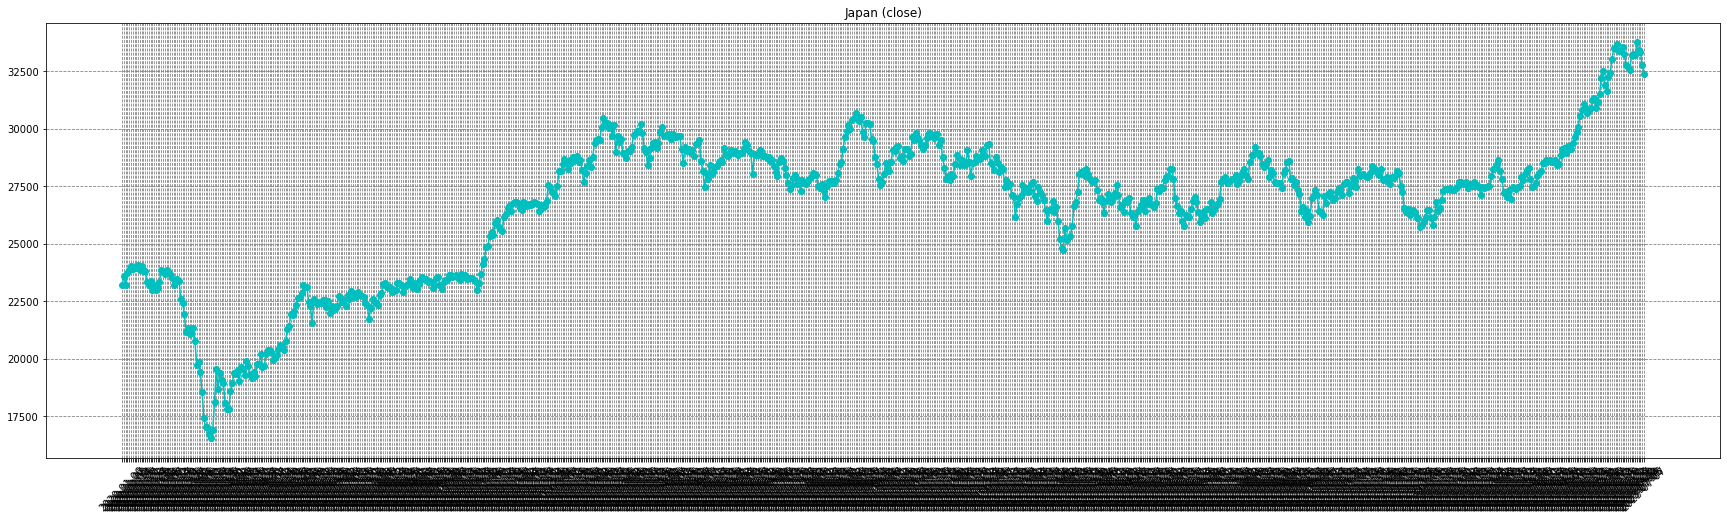

In [130]:
plt.figure(figsize=(30, 8)) 
plt.title('Japan (close)')
plt.xticks(rotation=45) 
plt.plot(df_japan_covid['Date'], df_japan_covid['Close'], 'co-')
plt.grid(color='gray', linestyle='--')

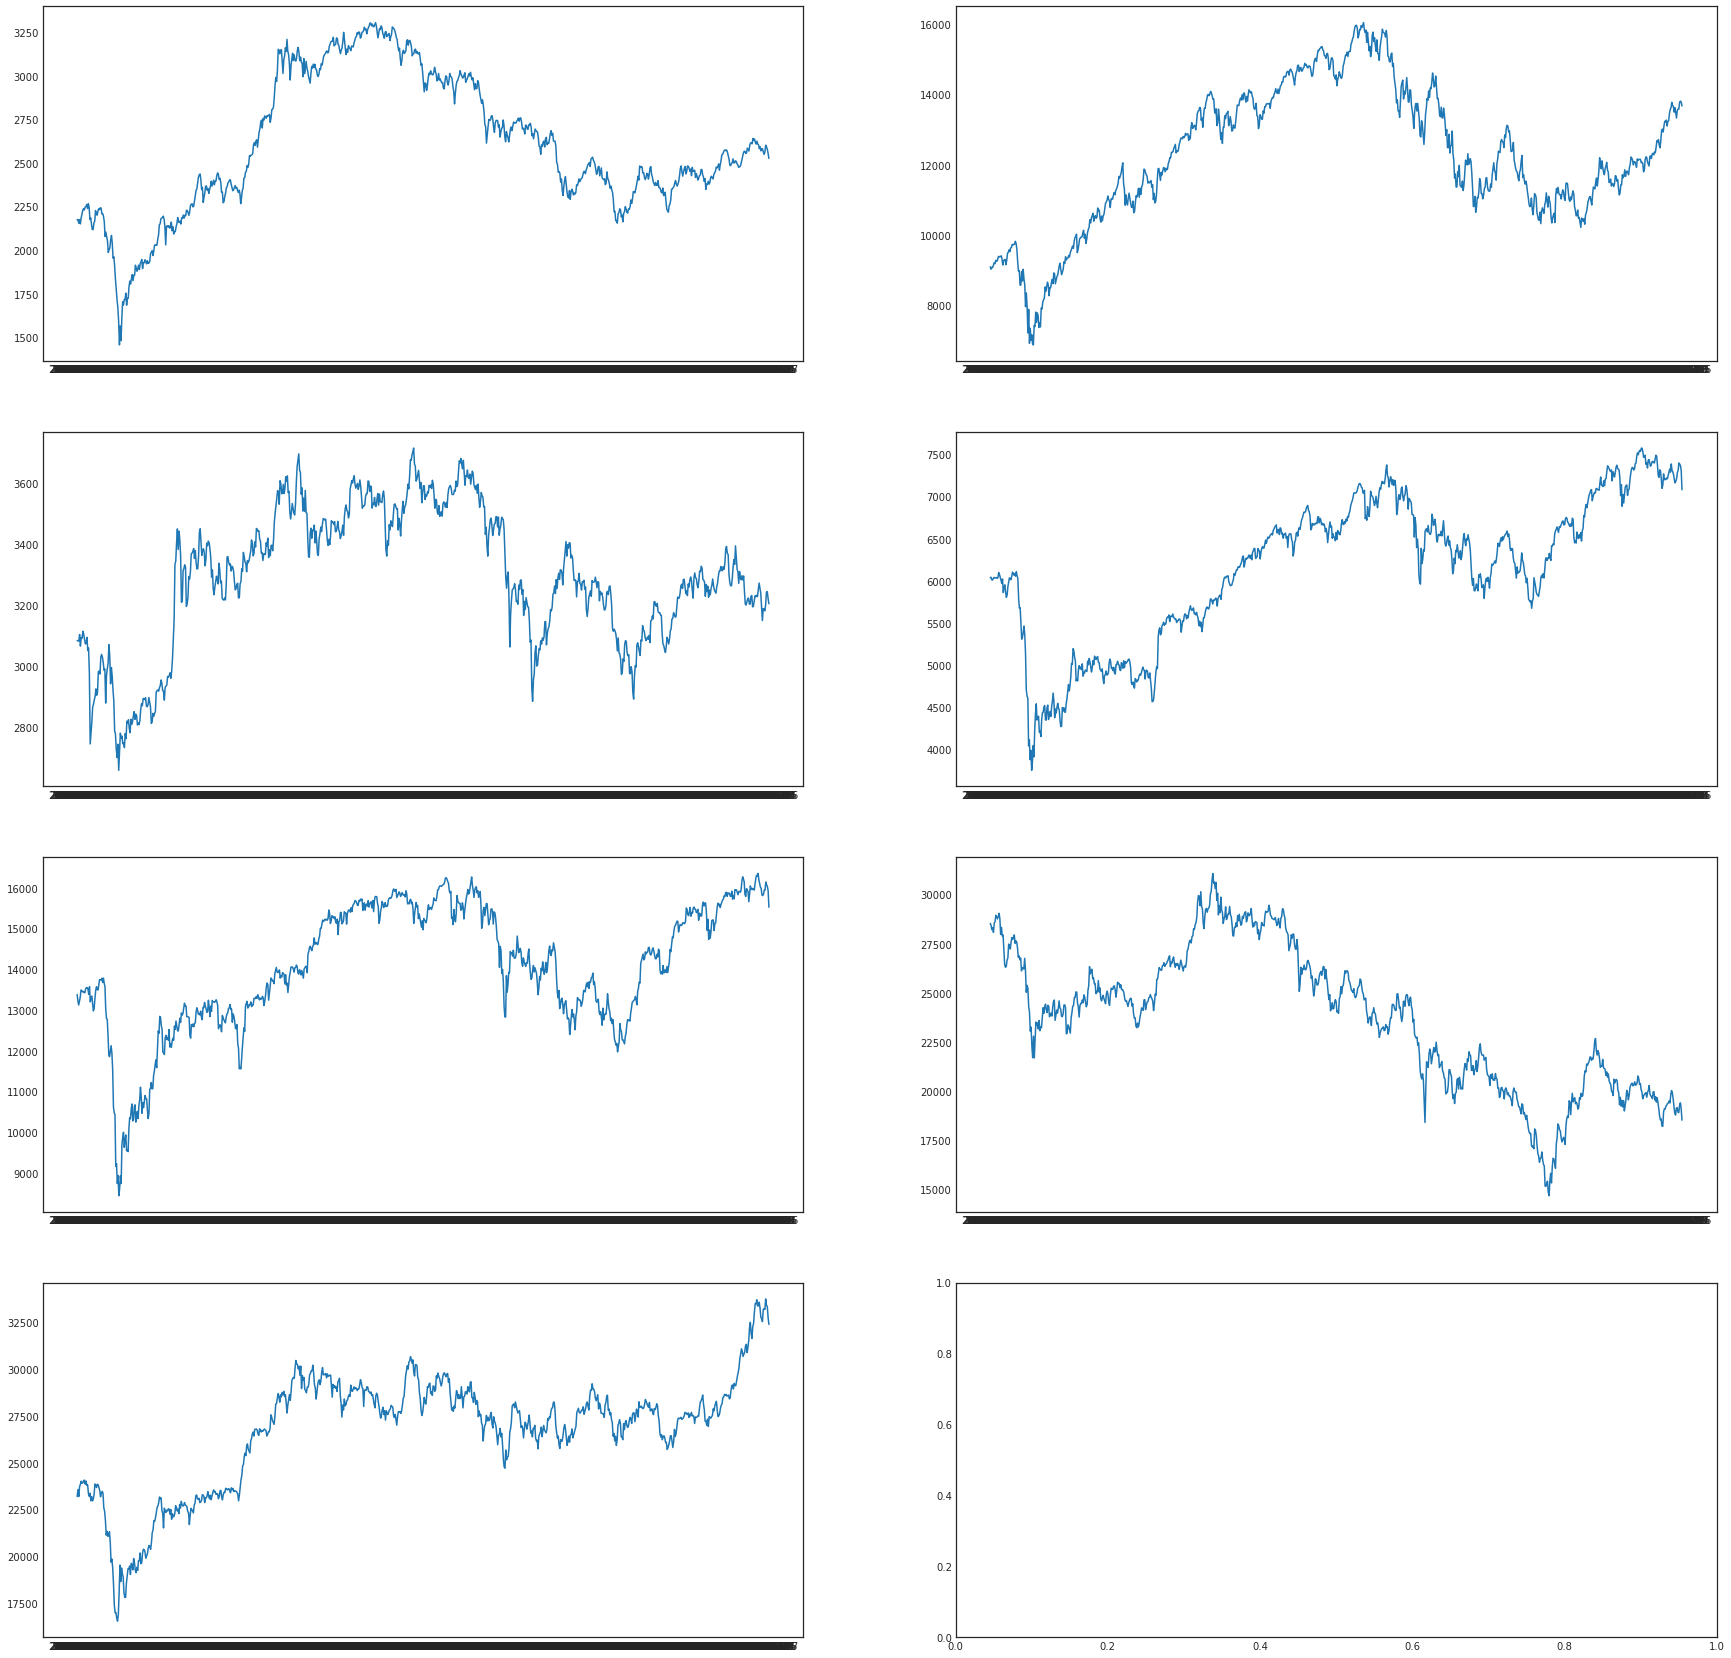

In [131]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,_)) = plt.subplots(4, 2,figsize=(30,30))
    ax1.plot(df_korea_covid['Date'], df_korea_covid['Close'])
    ax2.plot(df_us_covid['Date'], df_us_covid['Close'])
    ax3.plot(df_china_covid['Date'], df_china_covid['Close'])
    ax4.plot(df_france_covid['Date'], df_france_covid['Close'])
    ax5.plot(df_germany_covid['Date'], df_germany_covid['Close'])
    ax6.plot(df_hongkong_covid['Date'], df_hongkong_covid['Close'])
    ax7.plot(df_japan_covid['Date'], df_japan_covid['Close'])

In [134]:
df = pd.concat([df_korea_covid,df_us_covid,df_china_covid,df_france_covid,df_germany_covid,df_hongkong_covid,df_japan_covid]);df

,Date,Open,High,Low,Close,Adj Close,Volume,lat,lon,country,Year,Mon,Day
364,2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,2175.169922,494700.0,35.9078,127.7669,Korea,2020.0,1.0,2.0
365,2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,2176.459961,631600.0,35.9078,127.7669,Korea,2020.0,1.0,3.0
366,2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,2155.070068,592700.0,35.9078,127.7669,Korea,2020.0,1.0,6.0
367,2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,2175.540039,568200.0,35.9078,127.7669,Korea,2020.0,1.0,7.0
368,2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,2151.310059,913800.0,35.9078,127.7669,Korea,2020.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,2023-07-03,33517.601563,33762.808594,33510.550781,33753.328125,33753.328125,95400000.0,36.2048,138.2529,Japan,2023.0,7.0,3.0
1221,2023-07-04,33512.261719,33576.449219,33338.781250,33422.519531,33422.519531,99400000.0,36.2048,138.2529,Japan,2023.0,7.0,4.0
1222,2023-07-05,33165.058594,33389.218750,33041.140625,33338.699219,33338.699219,95100000.0,36.2048,138.2529,Japan,2023.0,7.0,5.0
1223,2023-07-06,33058.398438,33079.449219,32637.720703,32773.019531,32773.019531,100600000.0,36.2048,138.2529,Japan,2023.0,7.0,6.0


In [135]:
df['country'].unique()

array(['Korea', 'US', 'China', 'France', 'Germany', 'Hongkong', 'Japan'],
      dtype=object)

In [ ]:
edge_index= np.array([
    []
])

## define class

In [ ]:
def flatten_weight(T,N,ws,wt):
    Is = np.eye(N,N)
    lst = [[0]*T for t in range(T)]
    for i in range(T):
        for j in range(T):
            if i==j: 
                lst[i][j] = ws 
            elif abs(i-j)==1:
                lst[i][j] = Is
            else:
                lst[i][j] = Is*0
    return np.concatenate([np.concatenate(l,axis=1) for l in lst],axis=0) # TN*TN matrix

def make_Psi(T,N,edge_index,edge_weight):
    wt = np.zeros((T,T))
    for i in range(T):
        for j in range(T):
            if i==j :
                wt[i,j] = 0
            elif np.abs(i-j) <= 1 : 
                wt[i,j] = 1
    ws = np.zeros((N,N))
    for i in range(N):
        for j in range(edge_weight.shape[0]):
            if edge_index[0][j] == i :
                ws[i,edge_index[1][j]] = edge_weight[j]
    W = flatten_weight(T,N,ws,wt) # TN*TN matrix
    d = np.array(W.sum(axis=1))
    D = np.diag(d)
    L = np.array(np.diag(1/np.sqrt(d)) @ (D-W) @ np.diag(1/np.sqrt(d)))
    lamb, Psi = np.linalg.eigh(L)
    return Psi # TN*TN matrix

In [136]:
class Stock_graph:
    def __init__(self,df):
        self.df = df 
        self.f = df.Close.to_numpy()
        self.year = df.Year.to_numpy()
        self.mon = df.mon.to_numpy()
        self.day = df.day.to_numpy()
        self.lat = df.Latitude.to_numpy()
        self.long = df.Longitude.to_numpy()
        self.country = df.Country
        self.n = len(self.f)
        
        self.theta= None
    def get_distance(self):
        self.D = np.zeros([self.n,self.n])
        locations = np.stack([self.lat, self.long],axis=1)
        for i in tqdm.tqdm(range(self.n)):
            for j in range(i,self.n): 
                self.D[i,j]=haversine(locations[i],locations[j])
        # self.D = self.D+self.D.T
        self.W = self.D+self.D.T
    # def get_weightmatrix(self,theta=1,beta=0.5,kappa=4000):
    #     self.theta = theta
    #     dist = np.where(self.D<kappa,self.D,0)
    #     self.W = np.exp(-(dist/self.theta)**2)

    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)        
    def fit(self,m):
        self._eigen()
        self.fhat = self.Psi[:,0:m]@self.Psi[:,0:m].T@self.f
        self.df = self.df.assign(MagnitudeHat = self.fhat)
        self.df = self.df.assign(Residual = self.df.Magnitude- self.df.MagnitudeHat)
        plt.plot(self.f,'.')
        plt.plot(self.fhat,'x')
        return HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))
    def vis(self,MagThresh=7,ResThresh=1):
        fig = px.density_mapbox(self.df, 
                        lat='Latitude', 
                        lon='Longitude', 
                        z='Close', 
                        radius=5,
                        center=dict(lat=37, lon=126), 
                        zoom=5.7,
                        height=900,
                        opacity = 0.3,
                        mapbox_style="stamen-terrain")
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.add_scattermapbox(lat = self.df.query('Close > @MagThresh')['Latitude'],
                      lon = self.df.query('Close > @MagThresh')['Longitude'],
                      text = self.df.query('Close > @MagThresh')['Close'],
                      marker_size= 8,
                      marker_color= 'red',
                      opacity = 0.5
                      )
        fig.add_scattermapbox(lat = self.df.query('Residual**2 > @ResThresh')['Latitude'],
                      lon = self.df.query('Residual**2 > @ResThresh')['Longitude'],
                      text = self.df.query('Close > @ResThresh')['Close'],
                      marker_size= 8,
                      marker_color= 'blue',
                      opacity = 0.5
                      )
        return HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))
    def fit(self,ref=0.5): # fit with ebayesthresh
        self._eigen()
        self.fbar = self.Psi.T @ self.f # fbar := graph fourier transform of f
        self.power = self.fbar**2 
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        self.power_threshed=np.array(ebayesthresh(FloatVector(self.fbar**2)))
        self.fbar_threshed = np.where(self.power_threshed>0,self.fbar,0)
        self.fhat = self.Psi@self.fbar_threshed
        self.df = self.df.assign(CloseHat = self.fhat)
        self.df = self.df.assign(Residual = self.df.Close- self.df.CloseHat)
        self.con = np.where(self.df.Residual>0.7,1,0)
        #plt.plot(self.f,'.')
        #plt.plot(self.fhat,'x')

In [24]:
class MooYaHo3(MooYaHo2):
    